In [2]:
import re
import datetime
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

def get_year(title):
    search = re.findall("\(\d{4}\)", title) if isinstance(title, str) else []
    return (len(search) > 0 and search[len(search) - 1][1:-1]) or datetime.datetime.now().year

# cria nova coluna com ano do filme
# filmes['ano'] = filmes.apply(lambda row: get_year(row['titulo']), axis=1)

filmes

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
# extrai os generios e cria novas colunas para cada genero
generos = filmes.generos.str.get_dummies()
# concatena o dataframe original com o novo dataframe dos generos
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
#remove coluna antiga dos generos
dados_dos_filmes = dados_dos_filmes.drop(['generos'], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

# reescalando generos dos filmes
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans

# agrupando os filmes em 3 clusters
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]



# como o kmeans funciona?

[naftaliharris](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

1. Definir centróides aleatoriamente no plano
2. Calcular a distância entre os centróides
3. Os pontos que se encontram na primeira metade entre os centróides são de uma classe e os da segunda metade são de outra classe

4. Enquanto os centróides forem deslocados ou os pontos forem pintados de outra cor, faça:
    1. Otimize a distância do centróide para os pontos da sua classe (buscar se deslocar para o centro daquela classe)
    2. Recalcule as distâncias para os outros centróides e as suas novas fronteiras
    3. Pinte cada ponto de acordo com a nova fronteira que ele ocupa



In [6]:
print(generos.columns)

# valores de cada cluster para cada genero
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.63722226  0.05187577 -0.23073335 -0.26728823 -0.54564567
   0.60442142 -0.21557018 -0.14600153 -0.12288533  0.23128824  0.51342138
   0.12402975 -0.17965731  0.51908213 -0.33387071  0.51094818  1.361828
  -0.14041711 -0.06451267]
 [-0.05917995  0.13466656  1.11472497  1.93303294  2.11250048  0.15756617
  -0.32477665 -0.19996291 -0.60014413  1.21145499 -0.09492563 -0.2674432
   0.31102141  0.31164845 -0.13783356 -0.27300025  0.1405016  -0.47056597
  -0.16920423 -0.09000487]
 [ 0.03480946 -0.28477163 -0.22093888 -0.2519552  -0.26915746  0.19495594
  -0.18903877  0.12400144  0.16724425 -0.16678672 -0.07759683 -0.16208904
  -0.10645634  0.01764893 -0.18762601  0.18547585 -0.23416698 -0.47272163
   0

In [7]:
# mostra os valores de cada clustes (0,1,2) para cada um dos generos
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.637222,0.051876,-0.230733,-0.267288,-0.545646,0.604421,-0.215570,-0.146002,-0.122885,0.231288,0.513421,0.124030,-0.179657,0.519082,-0.333871,0.510948,1.361828,-0.140417,-0.064513
1,-0.059180,0.134667,1.114725,1.933033,2.112500,0.157566,-0.324777,-0.199963,-0.600144,1.211455,-0.094926,-0.267443,0.311021,0.311648,-0.137834,-0.273000,0.140502,-0.470566,-0.169204,-0.090005
2,0.034809,-0.284772,-0.220939,-0.251955,-0.269157,0.194956,-0.189039,0.124001,0.167244,-0.166787,-0.077597,-0.162089,-0.106456,0.017649,-0.187626,0.185476,-0.234167,-0.472722,0.087751,0.042513


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

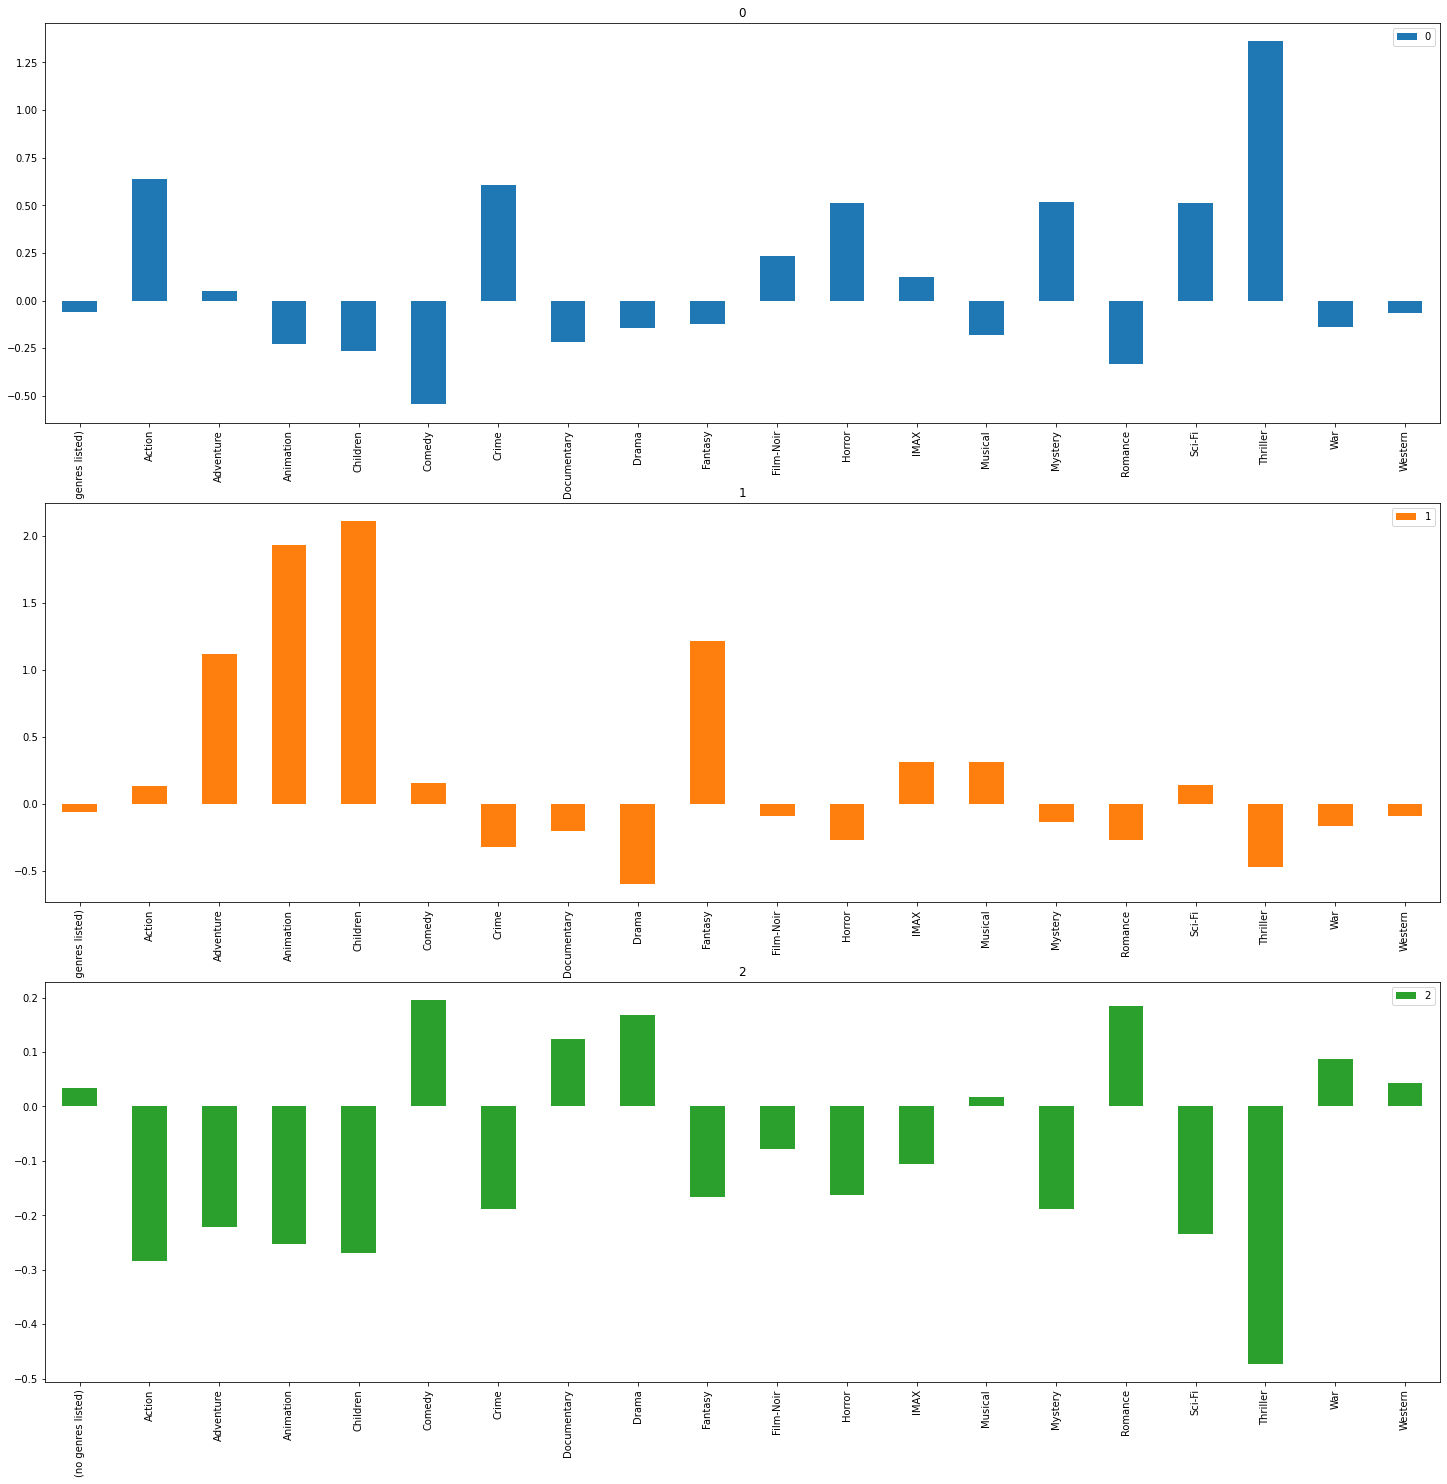

In [8]:
#plota o grafico dos grupos (usando o transpose para inverter as linhas e colunas do df) e assim mostrar 3 graficos
# 1 pra cada grupo, contendo os valores de cada genero para aquele grupo
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [14]:
print(f'clusteres dos filmes: {modelo.labels_}')
# filtra 10 exemplos de filmes do cluster 0
dados_dos_filmes[modelo.labels_ == 0].sample(10)

clusteres dos filmes: [1 1 2 ... 2 1 2]


,filme_id,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4519,6695,Jeepers Creepers 2 (2003),0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4854,7257,"Big Bounce, The (2004)",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
7068,69640,Public Enemies (2009),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5604,26985,Nirvana (1997),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7132,71254,Gamer (2009),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5471,26184,"Diamond Arm, The (Brilliantovaya ruka) (1968)",0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4244,6187,"Life of David Gale, The (2003)",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7229,73488,Blood: The Last Vampire (2009),0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3989,5628,Wasabi (2001),0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
5483,26285,Dark Star (1974),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
